In [1]:
%run Functions/analysis.py

In [2]:
players = preprocessing()

In [3]:
%run Functions/analysis.py

In [4]:
@interact(competitions = SelectMultiple(options = ['Serie A', 'Serie B', 'Serie C', 'Serie D', 'Copa do Brasil'],
                                        value = ['Serie A'],
                                        description = 'Competitions:',
                                        disabled = False),
          years = IntRangeSlider(value = [2019, 2020],
                                 min = 2013,
                                 max = 2020,
                                 step = 1,
                                 description = 'Period:',
                                 disabled = False,
                                 continuous_update = False,
                                 orientation = 'horizontal',
                                 readout = True,
                                 readout_format = 'd'))

def visualization(competitions, years):
    list_of_clubs = clubs(competitions, years)
    relation = relations_list_of_clubs(list_of_clubs, players)
    graph(relation)

interactive(children=(SelectMultiple(description='Competitions:', index=(0,), options=('Serie A', 'Serie B', '…

In [5]:
%run Functions/analysis2.py

In [6]:
players = preprocessing()

In [7]:
%run Functions/analysis2.py

In [8]:
@interact(competitions = SelectMultiple(options = ['Serie A', 'Serie B', 'Serie C', 'Serie D', 'Copa do Brasil'],
                                        value = ['Serie A'],
                                        description = 'Competitions:',
                                        disabled = False),
          years = IntRangeSlider(value = [2019, 2020],
                                 min = 2013,
                                 max = 2020,
                                 step = 1,
                                 description = 'Period:',
                                 disabled = False,
                                 continuous_update = False,
                                 orientation = 'horizontal',
                                 readout = True,
                                 readout_format = 'd'))

def visualization(competitions, years):
    list_of_clubs = clubs(competitions, years)
    relation = relations_list_of_clubs(list_of_clubs, players)
    graph(relation)

interactive(children=(SelectMultiple(description='Competitions:', index=(0,), options=('Serie A', 'Serie B', '…

In [9]:
%run Functions/analysis3.py

In [10]:
players = preprocessing()

In [172]:
%run Functions/analysis3.py

In [148]:
@interact(competitions = SelectMultiple(options = ['Serie A', 'Serie B', 'Serie C', 'Serie D', 'Copa do Brasil'],
                                        value = ['Serie A'],
                                        description = 'Competitions:',
                                        disabled = False),
          years = IntRangeSlider(value = [2019, 2020],
                                 min = 2013,
                                 max = 2020,
                                 step = 1,
                                 description = 'Period:',
                                 disabled = False,
                                 continuous_update = False,
                                 orientation = 'horizontal',
                                 readout = True,
                                 readout_format = 'd'))

def visualization(competitions, years):
    years = [i for i in range(years[0], years[1] + 1)]
    list_of_clubs = find_clubs(competitions, years)
    relation = relations_list_of_clubs(list_of_clubs, players)
    graph(relation)

interactive(children=(SelectMultiple(description='Competitions:', index=(0,), options=('Serie A', 'Serie B', '…

In [1]:
%run Functions/analysis3.py

In [20]:
%run Functions/interact.py

Output()

In [3]:
clubs = sorted(find_clubs(['Serie A', 'Serie B', 'Serie C', 'Serie D', 'Copa do Brasil'], [i for i in range(2013, 2021)]))
clubs

['4deJulho/PI',
 '7deSetembro/MS',
 'A.s.s.u./RN',
 'ABC/RN',
 'ASA/AL',
 'Afogados/PE',
 'Aguia/PA',
 'AguiaNegra/MS',
 'AguiadeMaraba/PA',
 'Aimore/RS',
 'Altos/PI',
 'Amadense/SE',
 'America/MG',
 'America/PE',
 'America/RN',
 'AmericadeNatal/RN',
 'Americano/RJ',
 'Anapolina/GO',
 'Anapolis/GO',
 'Aparecidense/GO',
 'Aquidauanense/MS',
 'Aracruz/ES',
 'Araguaia/MT',
 'ArapongasEsporteClube/PR',
 'Araxa/MG',
 'AssociacaoDesportivaItaborai/RJ',
 'AthleticoParanaense/PR',
 'Atletico/AC',
 'Atletico/BA',
 'Atletico/ES',
 'Atletico/GO',
 'Atletico/MG',
 'Atletico/PE',
 'AtleticoCearense/CE',
 'AtleticoPatrocinense/MG',
 'AtleticoRoraima/RR',
 'AtleticodeCajazeiras/PB',
 'Audax/SP',
 'Avai/SC',
 'Avenida/RS',
 'Bahia/BA',
 'BahiadeFeira/BA',
 'Bangu/RJ',
 'Baraunas/RN',
 'Barbalha/CE',
 'Barcelona/RO',
 'Bare/RR',
 'BeloJardim/PE',
 'Betim/MG',
 'Boa/MG',
 'Boavista/RJ',
 'Botafogo/PB',
 'Botafogo/RJ',
 'Botafogo/SP',
 'Bragantino/PA',
 'Brasil/RS',
 'Brasilia/DF',
 'Brasiliense/DF',
 'B

In [4]:
len(clubs)

276

In [8]:
add_clubs = ['4deJulho/PI',
 '7deSetembro/MS',
 'A.s.s.u./RN',
 'Afogados/PE',
 'Aguia/PA',
 'AguiaNegra/MS',
 'AguiadeMaraba/PA',
 'Aimore/RS',
 'Altos/PI',
 'Amadense/SE',
 'America/PE',
 'Americano/RJ',
 'Anapolina/GO',
 'Anapolis/GO',
 'Aparecidense/GO',
 'Aquidauanense/MS',
 'Aracruz/ES',
 'Araguaia/MT',
 'ArapongasEsporteClube/PR',
 'Araxa/MG',
 'AssociacaoDesportivaItaborai/RJ',
 'Atletico/AC',
 'Atletico/BA',
 'Atletico/ES',
 'Atletico/PE',
 'AtleticoCearense/CE',
 'AtleticoPatrocinense/MG',
 'AtleticoRoraima/RR',
 'AtleticodeCajazeiras/PB',
 'Audax/SP',
 'Avenida/RS',
 'BahiadeFeira/BA',
 'Bangu/RJ',
 'Baraunas/RN',
 'Barbalha/CE',
 'Barcelona/RO',
 'Bare/RR',
 'BeloJardim/PE',
 'Betim/MG',
 'Boavista/RJ',
 'Bragantino/PA',
 'Brasilia/DF',
 'Brasiliense/DF',
 'Brusque/SC',
 'C.r.a.c./GO',
 'Cabofriense/RJ',
 'Cameta/PA',
 'Capivariano/SP',
 'Caucaia/CE',
 'Ceilandia/DF',
 'Cene/MS',
 'Cianorte/PR',
 'ColoColo/BA',
 'Comercial/MS',
 'Cordino/MA',
 'Corumbaense/MS',
 'Coruripe/AL',
 'Crac/GO',
 'Desportiva/ES',
 'DomBosco/MT',
 'DuquedeCaxias/RJ',
 'EspiritoSanto/ES',
 'Estanciano/SE',
 'EstreladoNorte/ES',
 'FastClube/AM',
 'FcCascavel/PR',
 'Ferroviaria/SP',
 'Ferroviario/CE',
 'Flamengo/PE',
 'Flamengo/PI',
 'Floresta/CE',
 'FluminensedeFeira/BA',
 'FozdoIguacu/PR',
 'FreiPaulistano/SE',
 'Friburguense/RJ',
 'Galicia/BA',
 'Galvez/AC',
 'Gama/DF',
 'Gaucho/RS',
 'Genus/RO',
 'Globo/RN',
 'Goianesia/GO',
 'Goiania/GO',
 'GremioBarueri/SP',
 'Guarani/CE',
 'Guarani/SC',
 'GuaranideJuazeiro/CE',
 'Guarany/CE',
 'GuaranydeSobral/CE',
 'Gurupi/TO',
 'HercilioLuzFutebolClube/SC',
 'Imperatriz/MA',
 'Independente/PA',
 'IndependenteTucurui/PA',
 'InterdeLages/SC',
 'InterdeLimeira/SP',
 'Internacional/SC',
 'Interporto/TO',
 'Ipatinga/MG',
 'Ipora/GO',
 'Itabaiana/SE',
 'Itapora/MS',
 'Ituano/SP',
 'Itumbiara/GO',
 'Ivinhema/MS',
 'J.Malucelli/PR',
 'Jacioba/AL',
 'JacobinaEc/BA',
 'Jacuipense/BA',
 'Ji-parana/RO',
 'Juazeirense/BA',
 'Lagarto/SE',
 'Lajeadense/RS',
 'Linense/SP',
 'Luziania/DF',
 'Macapa/AP',
 'Madureira/RJ',
 'Manaus/AM',
 'Maranhao/MA',
 'MarcilioDias/SC',
 'Maringa/PR',
 'Metropolitano/SC',
 'Mirassol/SP',
 'Mixto/MT',
 'Murici/AL',
 'Nacional/AM',
 'Nacional/PR',
 'Nautico/RR',
 'Naviraiense/MS',
 'Noroeste/SP',
 'NovaIguacu/RJ',
 'Novo/MS',
 'NovoHamburgo/RS',
 'Novoperario/MS',
 'Novorizontino/SP',
 'Operario/MT',
 'Operario/PR',
 'Oratorio/AP',
 'Palmas/TO',
 'Paragominas/PA',
 'Parauapebas/PA',
 'Parnahyba/PI',
 'Pelotas/RS',
 'Penapolense/SP',
 'Piaui/PI',
 'PlacidodeCastro/AC',
 'Porto/PE',
 'Portuguesa/RJ',
 'Potiguar/RN',
 'PrincesadoSolimoes/AM',
 'Prudentopolis/PR',
 'Pstc/PR',
 'RealDesportivo/RO',
 'RealNoroeste/ES',
 'RedBullBrasil/SP',
 'Resende/RJ',
 'RioBranco/ES',
 'Rondoniense/RO',
 'S.francisco/PA',
 'SantaCruz/RN',
 'SantaRita/AL',
 'SantoAndre/SP',
 'SaoBernardo/SP',
 'SaoJose/RS',
 'SaoLuiz/RS',
 'SaoPaulo/RS',
 'SaoRaimundo/PA',
 'SaoRaimundo/RR',
 'Sergipe/SE',
 'Serra/ES',
 'SerraTalhada/PE',
 'Serrano/BA',
 'Serrano/PB',
 'Sinop/MT',
 'Sobradinho/DF',
 'SociedadeEsportivaJuventude/MA',
 'Sousa/PB',
 'Sparta/TO',
 'Tiradentes/CE',
 'Tocantinopolis/TO',
 'TocantinsEsporteClube/TO',
 'Toledo/PR',
 'Trem/AP',
 'Tupynambas/MG',
 'Uberlandia/MG',
 'Uniao/MT',
 'UniaodeRondonopolis/MT',
 'Uniclinic/CE',
 'Urt/MG',
 'Veranopolis/RS',
 'Vilhena/RO',
 'Vilhenense/RO',
 'Vitoria/PE',
 'VitoriaF.C./ES',
 'VitoriadaConquista/BA',
 'VoltaRedonda/RJ',
 'Votuporanguense/SP',
 'XvdePiracicaba/SP',
 'Ypiranga/AP',
 'Ypiranga/PE']

In [12]:
clubs_abc = sorted(find_clubs(['Serie A', 'Serie B', 'Serie C'], [i for i in range(2013, 2021)]))
add = []
for club in clubs_abc:
    if club in add_clubs:
        add.append(club)
        
        
add

['Aguia/PA',
 'AguiadeMaraba/PA',
 'Atletico/AC',
 'Baraunas/RN',
 'Betim/MG',
 'Brasiliense/DF',
 'Brusque/SC',
 'C.r.a.c./GO',
 'DuquedeCaxias/RJ',
 'Ferroviario/CE',
 'Globo/RN',
 'GremioBarueri/SP',
 'Imperatriz/MA',
 'Ituano/SP',
 'Jacuipense/BA',
 'Juazeirense/BA',
 'Madureira/RJ',
 'Manaus/AM',
 'Operario/PR',
 'SaoJose/RS',
 'VoltaRedonda/RJ']

In [13]:
img_files

{'America/MG': 'Escudos\\americamg_bra.png',
 'AthleticoParanaense/PR': 'Escudos\\atleticopr_bra.png',
 'Atletico/GO': 'Escudos\\atleticogo_bra.png',
 'Atletico/MG': 'Escudos\\atleticomg_bra.png',
 'Avai/SC': 'Escudos\\avai_bra.png',
 'Bahia/BA': 'Escudos\\bahia.png',
 'Botafogo/RJ': 'Escudos\\botafogorj_bra.png',
 'CSA/AL': 'Escudos\\csa_bra.png',
 'Ceara/CE': 'Escudos\\ceara_bra.png',
 'Chapecoense/SC': 'Escudos\\chapecoense_bra.png',
 'Corinthians/SP': 'Escudos\\corinthians_bra.png',
 'Coritiba/PR': 'Escudos\\coritiba_bra.png',
 'Criciuma/SC': 'Escudos\\criciuma_bra.png',
 'Cruzeiro/MG': 'Escudos\\cruzeiro_bra.png',
 'Figueirense/SC': 'Escudos\\figueirense.png',
 'Flamengo/RJ': 'Escudos\\flarj.png',
 'Fluminense/RJ': 'Escudos\\flurj.png',
 'Fortaleza/CE': 'Escudos\\fortaleza.png',
 'Goias/GO': 'Escudos\\goias.png',
 'Gremio/RS': 'Escudos\\gremio.png',
 'Internacional/RS': 'Escudos\\internacional_bra.png',
 'Joinville/SC': 'Escudos\\joinville.png',
 'Nautico/PE': 'Escudos\\nautico.pn

In [18]:
teams = ['Aguia/PA',
 'Atletico/AC',
 'Baraunas/RN',
 'Brasiliense/DF',
 'Brusque/SC',
 'C.r.a.c./GO',
 'DuquedeCaxias/RJ',
 'Ferroviario/CE',
 'Globo/RN',
 'GremioBarueri/SP',
 'Imperatriz/MA',
 'Ituano/SP',
 'Jacuipense/BA',
 'Juazeirense/BA',
 'Madureira/RJ',
 'Manaus/AM',
 'SaoJose/RS',
 'VoltaRedonda/RJ']

files = ['aguiamaraba.png',
 'atleticoac.png',
 'baraunas.png',
 'brasiliense.png',
 'brusque.png',
 'crac.png',
 'duque_caxias.png',
 'ferroviario.png',
 'globo.png',
 'gremiobarueri.png',
 'imperatriz.png',
 'ituanofc.png',
 'jacuipense.png',
 'juazeirense.png',
 'madureira.png',
 'manausfc.png',
 'saojose_rs.png',
 'volta.png']

for i in range(len(files)):
    img_files[teams[i]] = 'Escudos\\' + files[i] + '.png'

In [19]:
img_files

{'America/MG': 'Escudos\\americamg_bra.png',
 'AthleticoParanaense/PR': 'Escudos\\atleticopr_bra.png',
 'Atletico/GO': 'Escudos\\atleticogo_bra.png',
 'Atletico/MG': 'Escudos\\atleticomg_bra.png',
 'Avai/SC': 'Escudos\\avai_bra.png',
 'Bahia/BA': 'Escudos\\bahia.png',
 'Botafogo/RJ': 'Escudos\\botafogorj_bra.png',
 'CSA/AL': 'Escudos\\csa_bra.png',
 'Ceara/CE': 'Escudos\\ceara_bra.png',
 'Chapecoense/SC': 'Escudos\\chapecoense_bra.png',
 'Corinthians/SP': 'Escudos\\corinthians_bra.png',
 'Coritiba/PR': 'Escudos\\coritiba_bra.png',
 'Criciuma/SC': 'Escudos\\criciuma_bra.png',
 'Cruzeiro/MG': 'Escudos\\cruzeiro_bra.png',
 'Figueirense/SC': 'Escudos\\figueirense.png',
 'Flamengo/RJ': 'Escudos\\flarj.png',
 'Fluminense/RJ': 'Escudos\\flurj.png',
 'Fortaleza/CE': 'Escudos\\fortaleza.png',
 'Goias/GO': 'Escudos\\goias.png',
 'Gremio/RS': 'Escudos\\gremio.png',
 'Internacional/RS': 'Escudos\\internacional_bra.png',
 'Joinville/SC': 'Escudos\\joinville.png',
 'Nautico/PE': 'Escudos\\nautico.pn

In [ ]:
{'America/MG': 'Escudos\\americamg_bra.png',
             'AthleticoParanaense/PR': 'Escudos\\atleticopr_bra.png',
             'Atletico/GO': 'Escudos\\atleticogo_bra.png',
             'Atletico/MG': 'Escudos\\atleticomg_bra.png',
             'Avai/SC': 'Escudos\\avai_bra.png',
             'Bahia/BA': 'Escudos\\bahia.png',
             'Botafogo/RJ': 'Escudos\\botafogorj_bra.png',
             'CSA/AL': 'Escudos\\csa_bra.png',
             'Ceara/CE': 'Escudos\\ceara_bra.png',
             'Chapecoense/SC': 'Escudos\\chapecoense_bra.png',
             'Corinthians/SP': 'Escudos\\corinthians_bra.png',
             'Coritiba/PR': 'Escudos\\coritiba_bra.png',
             'Criciuma/SC': 'Escudos\\criciuma_bra.png',
             'Cruzeiro/MG': 'Escudos\\cruzeiro_bra.png',
             'Figueirense/SC': 'Escudos\\figueirense.png',
             'Flamengo/RJ': 'Escudos\\flarj.png',
             'Fluminense/RJ': 'Escudos\\flurj.png',
             'Fortaleza/CE': 'Escudos\\fortaleza.png',
             'Goias/GO': 'Escudos\\goias.png',
             'Gremio/RS': 'Escudos\\gremio.png',
             'Internacional/RS': 'Escudos\\internacional_bra.png',
             'Joinville/SC': 'Escudos\\joinville.png',
             'Nautico/PE': 'Escudos\\nautico.png',
             'Palmeiras/SP': 'Escudos\\palmeiras.png',
             'Parana/PR': 'Escudos\\parana.png',
             'PontePreta/SP': 'Escudos\\pontepreta_bra.png',
             'Portuguesa/SP': 'Escudos\\portuguesasp_bra.png',
             'RedBullBragantino/SP': 'Escudos\\bragantino_bra.png',
             'SantaCruz/PE': 'Escudos\\santa.png',
             'Santos/SP': 'Escudos\\santos.png',
             'SaoPaulo/SP': 'Escudos\\saopaulo_bra.png',
             'Sport/PE': 'Escudos\\sport.png',
             'Tubarao/SC': 'Escudos\\atleticotubarao_sc.png',
             'VascodaGama/RJ': 'Escudos\\vasco.png',
             'Vitoria/BA': 'Escudos\\vitoria.png',
             'ABC/RN': 'Escudos\\abcrn_bra.png',
             'ASA/AL': 'Escudos\\asaarapiracaal_bra.png',
             'America/RN': 'Escudos\\americarn.png',
             'Boa/MG': 'Escudos\\boa_mg.png',
             'Botafogo/PB': 'Escudos\\botafogopb_bra.png',
             'Botafogo/SP': 'Escudos\\botafogosp_bra.png',
             'Brasil/RS': 'Escudos\\brasilpelotas_bra.png',
             'CRB/AL': 'Escudos\\crb_bra.png',
             'Caldense/MG': 'Escudos\\caldense_bra.png',
             'Campinense/PB': 'Escudos\\campinensepb_bra.png',
             'Caxias/RS': 'Escudos\\caxias.png',
             'Central/PE': 'Escudos\\central_bra.png',
             'Confianca/SE': 'Escudos\\confianca_se.png',
             'Cuiaba/MT': 'Escudos\\cuiaba_bra.png',
             'Guarani/SP': 'Escudos\\guaranisp_bra.png',
             'Guaratingueta/SP': 'Escudos\\guaratinguetasp_bra.png',
             'Icasa/CE': 'Escudos\\icasa_ce.png',
             'Juventude/RS': 'Escudos\\juventude.png',
             'Londrina/PR': 'Escudos\\londrina_pr.png',
             'Luverdense/MT': 'Escudos\\luverdensemt_bra.png',
             'Macae/RJ': 'Escudos\\macaerj_bra.png',
             'MogiMirim/SP': 'Escudos\\mogimirim_sp.png',
             'MotoClub/MA': 'Escudos\\motoclubma_bra.png',
             'Oeste/SP': 'Escudos\\oestesp_bra.png',
             'Operario/PR': 'Escudos\\operario_pr.png',
             'Paysandu/PA': 'Escudos\\paysandu.png',
             'Remo/PA': 'Escudos\\remo.png',
             'RioBranco/AC': 'Escudos\\riobranco_ac.png',
             'River/PI': 'Escudos\\riverpi_bra.png',
             'Salgueiro/PE': 'Escudos\\salgueirope_bra.png',
             'SampaioCorrea/MA': 'Escudos\\samapaiocorrea_ma.png',
             'Santos/AP': 'Escudos\\ap_santos.png',
             'SaoBento/SP': 'Escudos\\saobento_bra.png',
             'SaoCaetano/SP': 'Escudos\\saocaetano_bra.png',
             'Tombense/MG': 'Escudos\\tombense_mg.png',
             'Treze/PB': 'Escudos\\trezepb_bra.png',
             'Tupi/MG': 'Escudos\\tupijf_bra.png',
             'VilaNova/GO': 'Escudos\\vilago.png',
             'VillaNova/MG': 'Escudos\\villanovamg.png',
             'Ypiranga/RS': 'Escudos\\ypiranga_rs.png',
             'Aguia/PA': 'Escudos\\aguiamaraba.png.png',
             'Atletico/AC': 'Escudos\\atleticoac.png.png',
             'Baraunas/RN': 'Escudos\\baraunas.png.png',
             'Brasiliense/DF': 'Escudos\\brasiliense.png.png',
             'Brusque/SC': 'Escudos\\brusque.png.png',
             'C.r.a.c./GO': 'Escudos\\crac.png.png',
             'DuquedeCaxias/RJ': 'Escudos\\duque_caxias.png.png',
             'Ferroviario/CE': 'Escudos\\ferroviario.png.png',
             'Globo/RN': 'Escudos\\globo.png.png',
             'GremioBarueri/SP': 'Escudos\\gremiobarueri.png.png',
             'Imperatriz/MA': 'Escudos\\imperatriz.png.png',
             'Ituano/SP': 'Escudos\\ituanofc.png.png',
             'Jacuipense/BA': 'Escudos\\jacuipense.png.png',
             'Juazeirense/BA': 'Escudos\\juazeirense.png.png',
             'Madureira/RJ': 'Escudos\\madureira.png.png',
             'Manaus/AM': 'Escudos\\manausfc.png.png',
             'SaoJose/RS': 'Escudos\\saojose_rs.png.png',
             'VoltaRedonda/RJ': 'Escudos\\volta.png.png'}

In [225]:
competitions = SelectMultiple(options = ['Serie A', 'Serie B', 'Serie C', 'Serie D', 'Copa do Brasil'],
                              value = ['Serie A'],
                              description = 'Competitions:',
                              disabled = False)

years = IntRangeSlider(value = [2019, 2020],
                       min = 2013,
                       max = 2020,
                       step = 1,
                       description = 'Period:',
                       disabled = False,
                       continuous_update = False,
                       orientation = 'horizontal',
                       readout = True,
                       readout_format = 'd')

max_clubs = BoundedIntText(value = 20,
                           min = 5,
                           max = 40,
                           step = 1,
                           description = 'Nº Nodes (max):',
                           disabled = False)

def visualization(competitions, years, max_clubs):
    years = [i for i in range(years[0], years[1] + 1)] 
    list_of_clubs = find_clubs(competitions, years)
    relation = relations_list_of_clubs(list_of_clubs, players)
    relation.sort(reverse = True, key = lambda x : x[0][1])
    if max_clubs < len(relation):
        relation = relation[0:max_clubs]
    else:
        max_clubs = len(relation)
    
    graph(relation, competitions, years, max_clubs)
    
ip = interactive(visualization,
                 competitions = competitions,
                 years = years,
                 max_clubs = max_clubs)

display(HBox(ip.children[0:3]))

display(ip.children[-1])

Output()

In [179]:
%run Functions/analysis3.py

In [207]:
list_of_clubs = find_clubs(['Serie A'], [i for i in range(2019, 2021)])
relation = relations_list_of_clubs(list_of_clubs, players)

In [208]:
all_clubs = []

for item in relation:
    all_clubs.append([item[0][0], item[0][1]])
    
all_clubs.sort(reverse = True, key = lambda x : x[1])
all_clubs

[['RedBullBragantino/SP', 221],
 ['Goias/GO', 203],
 ['Bahia/BA', 192],
 ['Avai/SC', 190],
 ['Atletico/GO', 190],
 ['Ceara/CE', 185],
 ['Coritiba/PR', 184],
 ['Botafogo/RJ', 176],
 ['Sport/PE', 170],
 ['Fortaleza/CE', 165],
 ['Chapecoense/SC', 163],
 ['AthleticoParanaense/PR', 161],
 ['VascodaGama/RJ', 161],
 ['Internacional/RS', 160],
 ['Fluminense/RJ', 157],
 ['Santos/SP', 153],
 ['Gremio/RS', 147],
 ['Palmeiras/SP', 146],
 ['Cruzeiro/MG', 141],
 ['Flamengo/RJ', 140],
 ['Atletico/MG', 138],
 ['Corinthians/SP', 126],
 ['CSA/AL', 122],
 ['SaoPaulo/SP', 120]]

In [151]:
clubs = []
total = 0
for i in relation:
    if i[0][1] > 100:
        total += 1
        clubs.append(replace(i[0][0]))

print(total)

clubs = sorted(clubs)

for club in img_files:
    if club in clubs:
        clubs.remove(club)

print(len(clubs))
clubs

74
0


[]

In [144]:
path = 'Escudos\\'
end_path = '.png'

In [145]:
for i in range(len(files)):
    img_files[clubs[i]] = path + files[i] + end_path

# Testes

In [5]:
players = preprocessing()

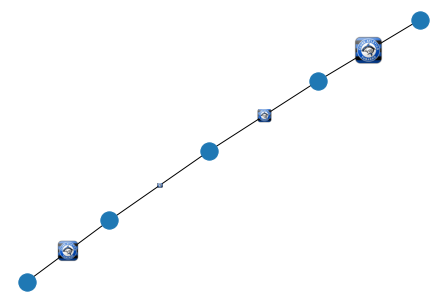

In [4]:
# import networkx as nx
# import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Escudos/atleticotubarao_sc.png')
G = nx.Graph()
G.add_edge(0, 1, image = img, size = 0.1)
G.add_edge(1, 2, image = img, size = 0.05)
G.add_edge(2, 3, image = img, size = 0.02)
G.add_edge(3, 4, image = img, size = 0.075)

pos = nx.spring_layout(G)
nx.draw(G, pos)

ax = plt.gca()
fig = plt.gcf()
label_pos = 0.5
trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

for (n1, n2) in G.edges():
    (x1, y1) = pos[n1]
    (x2, y2) = pos[n2]
    (x, y) = (x1 * label_pos + x2 * (1.0 - label_pos),
              y1 * label_pos + y2 * (1.0 - label_pos))
    xx, yy = trans((x, y))
    xa, ya = trans2((xx, yy))
    imsize = G[n1][n2]['size']
    img = G[n1][n2]['image']
    a = plt.axes([xa - imsize/2.0, ya - imsize/2.0, imsize, imsize])
    a.imshow(img)
    a.set_aspect('equal')
    a.axis('off')
    

In [ ]:
import glob
from numpy import sqrt
import time

Below we can see what relationship exists between the players of each club. Each node represents a club and an edge between
two nodes represents that these clubs have players in commom (that is, players who have served in both clubs).

The bigger the node, the more players passed through the club.
Similarly, a thicker edge represents that the two clubs have more players in commom.


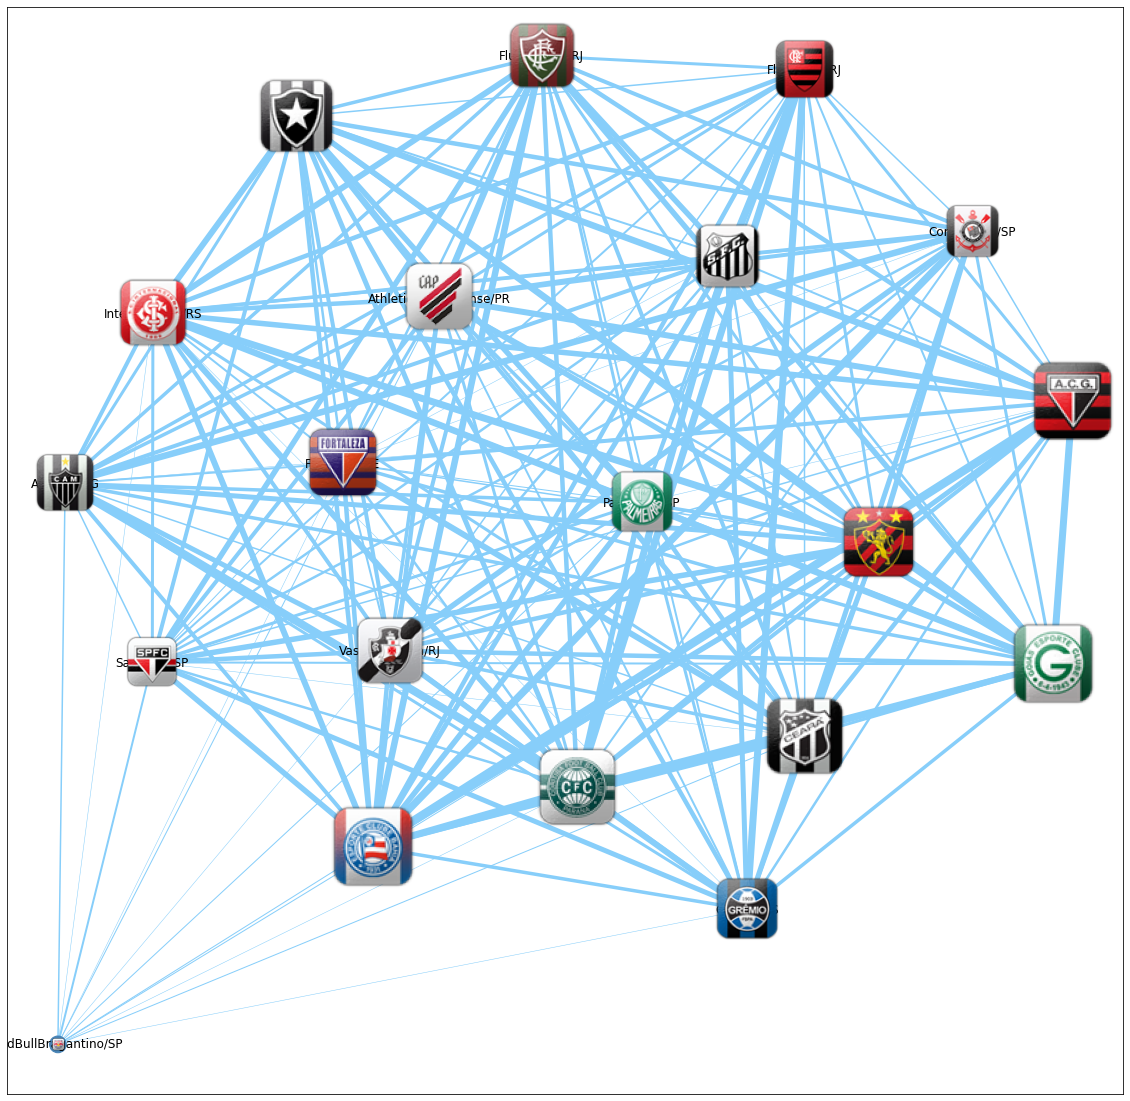

In [4]:
# path = 'Escudos/'
# files = [f for f in glob.glob(path + "*.png")]
# img = []
# for f in files:
#     img.append(mpimg.imread(f))

# N = len(files)

competitions = ['Serie A']
years = [2020]
list_of_clubs = clubs(competitions, years)
relation = relations_list_of_clubs(list_of_clubs, players)
G, pos, ax, fig = graph(relation)

# G = nx.watts_strogatz_graph(N, 4, 0.2)
# pos = nx.spring_layout(G)

# nx.draw_networkx(G, pos, width = 3, edge_color = 'r', alpha = 0.6)
# ax = plt.gca()
# fig = plt.gcf()
# trans = ax.transData.transform
# trans2 = fig.transFigure.inverted().transform
# biggest = max(nx.get_node_attributes(G, 'weight'))
# biggest = nx.get_node_attributes(G, 'weight')[biggest]

# rename = {}

# for n in G.nodes():
#     if n in img_files:
#         rename[n] = ''
#         img = mpimg.imread(img_files[n])
#         imsize = (nx.get_node_attributes(G, 'weight')[n])/biggest * 0.05
#         (x, y) = pos[n]
#         xx, yy = trans((x, y))
#         xa, ya = trans2((xx, yy))
#         a = plt.axes([xa - imsize/2.0, ya - imsize/2.0, imsize, imsize])
#         a.imshow(img)
#         a.set_aspect('equal')
#         a.axis('off')
#     else:
#         rename[n] = n
        
# G = nx.relabel_nodes(G, rename, copy = False)
# plt.show()
# rename

In [13]:
img_files

{'America/MG': 'Escudos\\americamg_bra.png',
 'AthleticoParanaense/PR': 'Escudos\\atleticopr_bra.png',
 'Atletico/GO': 'Escudos\\atleticogo_bra.png',
 'Atletico/MG': 'Escudos\\atleticomg_bra.png',
 'Avai/SC': 'Escudos\\avai_bra.png',
 'Bahia/BA': 'Escudos\\bahia.png',
 'Botafogo/RJ': 'Escudos\\botafogorj_bra.png',
 'CSA/AL': 'Escudos\\csa_bra.png',
 'Ceara/CE': 'Escudos\\ceara_bra.png',
 'Chapecoense/SC': 'Escudos\\chapecoense_bra.png',
 'Corinthians/SP': 'Escudos\\corinthians_bra.png',
 'Coritiba/PR': 'Escudos\\coritiba_bra.png',
 'Criciuma/SC': 'Escudos\\criciuma_bra.png',
 'Cruzeiro/MG': 'Escudos\\cruzeiro_bra.png',
 'Figueirense/SC': 'Escudos\\figueirense.png',
 'Flamengo/RJ': 'Escudos\\flarj.png',
 'Fluminense/RJ': 'Escudos\\flurj.png',
 'Fortaleza/CE': 'Escudos\\fortaleza.png',
 'Goias/GO': 'Escudos\\goias.png',
 'Gremio/RS': 'Escudos\\gremio.png',
 'Internacional/RS': 'Escudos\\internacional_bra.png',
 'Joinville/SC': 'Escudos\\joinville.png',
 'Nautico/PE': 'Escudos\\nautico.pn

In [10]:
img_files = {'America/MG' : 'Escudos\\americamg_bra.png',
             'AthleticoParanaense/PR' : 'Escudos\\atleticopr_bra.png',
             'Atletico/GO' : 'Escudos\\atleticogo_bra.png',
             'Atletico/MG' : 'Escudos\\atleticomg_bra.png',
             'Avai/SC' : 'Escudos\\avai_bra.png',
             'Bahia/BA' : 'Escudos\\bahia.png',
             'Botafogo/RJ' : 'Escudos\\botafogorj_bra.png',
             'CSA/AL' : 'Escudos\\csa_bra.png',
             'Ceara/CE' : 'Escudos\\ceara_bra.png',
             'Chapecoense/SC' : 'Escudos\\chapecoense_bra.png',
             'Corinthians/SP' : 'Escudos\\corinthians_bra.png',
             'Coritiba/PR' : 'Escudos\\coritiba_bra.png',
             'Criciuma/SC' : 'Escudos\\criciuma_bra.png',
             'Cruzeiro/MG' : 'Escudos\\cruzeiro_bra.png',
             'Figueirense/SC' : 'Escudos\\figueirense.png',
             'Flamengo/RJ' : 'Escudos\\flarj.png',
             'Fluminense/RJ' : 'Escudos\\flurj.png',
             'Fortaleza/CE' : 'Escudos\\fortaleza.png',
             'Goias/GO' : 'Escudos\\goias.png',
             'Gremio/RS' : 'Escudos\\gremio.png',
             'Internacional/RS' : 'Escudos\\internacional_bra.png',
             'Joinville/SC' : 'Escudos\\joinville.png',
             'Nautico/PE' : 'Escudos\\nautico.png',
             'Palmeiras/SP' : 'Escudos\\palmeiras.png',
             'Parana/PR' : 'Escudos\\parana.png',
             'PontePreta/SP' : 'Escudos\\pontepreta_bra.png',
             'Portuguesa/SP' : 'Escudos\\portuguesasp_bra.png',
             'RedBullBragantino/SP' : 'Escudos\\bragantino_bra.png',
             'SantaCruz/PE' : 'Escudos\\santa.png',
             'Santos/SP' : 'Escudos\\santos.png',
             'SaoPaulo/SP' : 'Escudos\\saopaulo_bra.png',
             'Sport/PE' : 'Escudos\\sport.png',
             'Tubarao/SC' : 'Escudos\\atleticotubarao_sc.png',
             'VascodaGama/RJ' : 'Escudos\\vasco.png',
             'Vitoria/BA' : 'Escudos\\vitoria.png'}

In [8]:
'SaoPaulo/SP' in img_files

True

In [23]:
G = nx.MultiGraph()
G.add_edge(0, 1, value="a")  # returns the key for this edge
G.add_edge(0, 2, value="b")
G.add_edge(0, 3, value="c")
mapping = {1: 4, 2: 4}
print(G[0])
H = nx.relabel_nodes(G, mapping, copy = False)
print(H[0])
G.nodes()

{1: {0: {'value': 'a'}}, 2: {0: {'value': 'b'}}, 3: {0: {'value': 'c'}}}
{3: {0: {'value': 'c'}}, 4: {0: {'value': 'a'}, 1: {'value': 'b'}}}


NodeView((0, 3, 4))

In [64]:
a = {'Gremio/RS': 146, 'Santos/SP': 153, 'Atletico/MG': 138, 'Avai/SC': 190, 'Ceara/CE': 185, 'CSA/AL': 122, 'Palmeiras/SP': 146, 'Fortaleza/CE': 165, 'SaoPaulo/SP': 120, 'Botafogo/RJ': 176, 'Flamengo/RJ': 140, 'Cruzeiro/MG': 141, 'Fluminense/RJ': 156, 'Goias/GO': 192, 'Chapecoense/SC': 163, 'Internacional/RS': 160, 'Bahia/BA': 191, 'Corinthians/SP': 126, 'AthleticoParanaense/PR': 161, 'VascodaGama/RJ': 161, 'RedBullBragantino/SP': 28, 'Atletico/GO': 190, 'Sport/PE': 170, 'Coritiba/PR': 184}

In [75]:
w_max = 0
c_max = ''
w_min = 1000
c_min = ''
for item in a:
    if a[item] > w_max:
        w_max = a[item]
        c_max = item
    if a[item] < w_min:
        w_min = a[item]
        c_min = item

print(w_max, c_max)
print(w_min, c_min)

192 Goias/GO
28 RedBullBragantino/SP
